<a href="https://colab.research.google.com/github/jcazali/IA/blob/main/opencv_deteccao_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.melhoresdestinos.com.br/wp-content/uploads/2021/04/grecia-capa-820x430.jpg

(430, 820, 3)
258 492


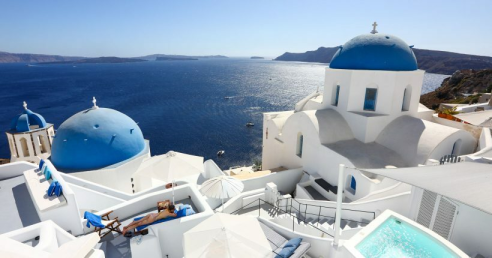

(258, 492, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# carregar imagem
img = cv2.imread('grecia.jpg')
print(img.shape)
escala = 60
width = int(img.shape[0] * escala / 100)
height = int(img.shape[1] * escala / 100)
print(width, height)
# Resize da imagem
resized = cv2.resize(img, (height, width), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)
print(resized.shape)

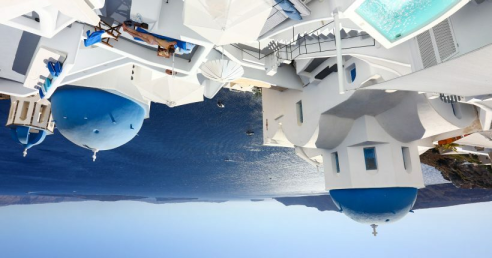

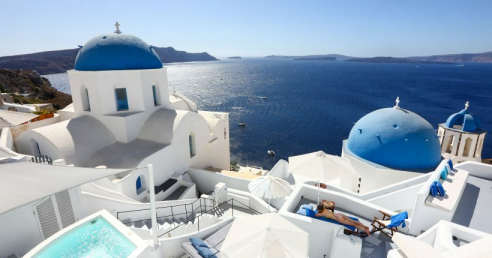

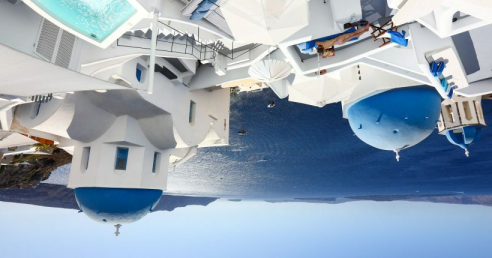

In [ ]:
flip = cv2.flip(resized, 0)
cv2_imshow(flip)

flip = cv2.flip(resized, 1)
cv2_imshow(flip)

flip = cv2.flip(resized, -1)
cv2_imshow(flip)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


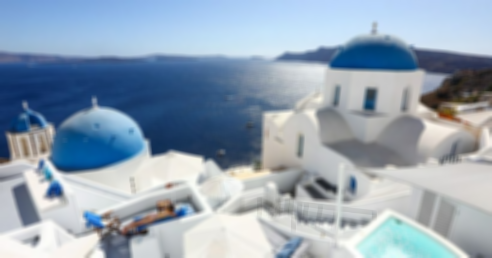

In [ ]:
import numpy as np

kernel = np.ones((5,5), np.float32)/25
print(kernel)
conv = cv2.filter2D(resized, -1, kernel)
cv2_imshow(conv)

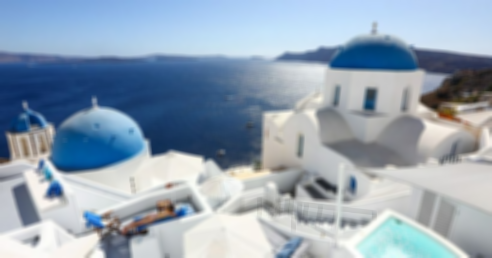

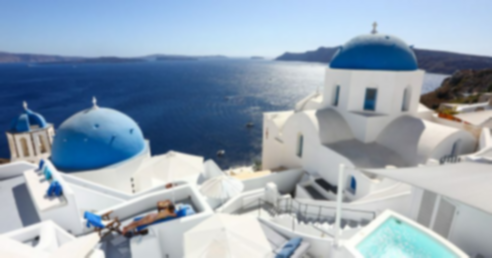

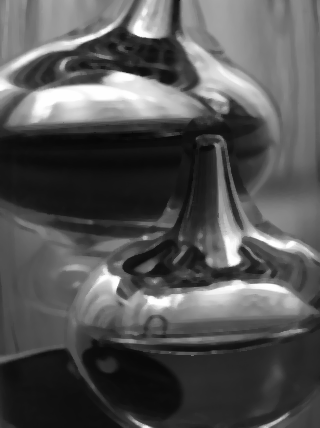

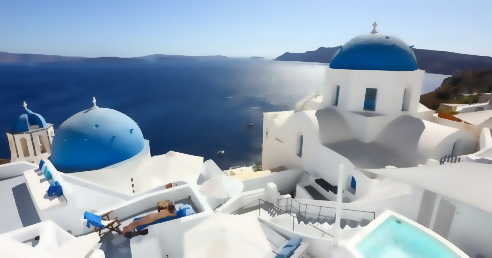

In [ ]:
blur = cv2.blur(resized, (5,5), 0)
cv2_imshow(blur)

blur = cv2.GaussianBlur(resized, (5,5), 0)
cv2_imshow(blur)

salt_pepper = cv2.imread('noise_salt_and_pepper.png')
median = cv2.medianBlur(salt_pepper, 5)
cv2_imshow(median)
cv2.imwrite('salt_pepper_corret.jpg', median) #Salva a imagem

blur = cv2.bilateralFilter(resized, 9, 75, 75)
cv2_imshow(blur)

52 40
-0.6711772680282593 0.9960829615592957 (55, 216) (223, 86)


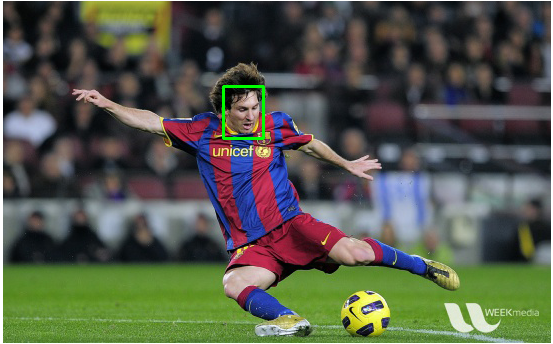

In [ ]:
img_rgb = cv2.imread('messi.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('messi_face.jpg', 0) #0 abre em escala de cinza
w, h = template.shape
print(w, h)

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
# print(res)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)
bottom_right = (max_loc[0] + h, max_loc[1] + w)
cv2.rectangle(img_rgb, max_loc, bottom_right, (0, 255, 0), 2)
cv2_imshow(img_rgb)

15 10
(240, 256, 3)


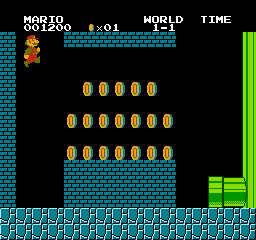

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.11728832  0.01343914 -0.03266496 ...  0.05808862 -0.02619789
   0.16934204]
 [-0.323413   -0.2608076  -0.24019742 ... -0.1413916  -0.14273028
   0.07651313]
 [-0.21301316 -0.07280712 -0.00688373 ...  0.0785116   0.03786857
   0.18363343]]
(82, 81)
(98, 81)
(114, 81)
(130, 81)
(146, 81)
(66, 113)
(82, 113)
(98, 113)
(114, 113)
(130, 113)
(146, 113)
(162, 113)
(66, 145)
(82, 145)
(98, 145)
(114, 145)
(130, 145)
(146, 145)
(162, 145)


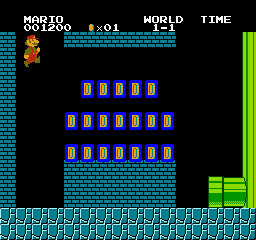

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) #converte para cinza
template = cv2.imread('coin.png', 0) #0 abre a imagem em preto e branco
largura, altura = template.shape #pega dimensão da imagem
print(largura, altura)
print(img_rgb.shape)
cv2_imshow(img_rgb)
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
print(res)
th = 0.8
loc = np.where(res >= th) #somente valores maiores que o threshold
for ponto in zip(*loc[::-1]):
  print(ponto)
  cv2.rectangle(img_rgb, ponto, (ponto[0] + altura, ponto[1] + largura), (255, 0, 0), 2)
cv2_imshow(img_rgb)